<a href="https://colab.research.google.com/github/Storm00212/Electromagnetics/blob/main/Dot_product_vs_cross_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define vectors
A = np.array([3, 0, 0])
B = np.array([2, 2, 0])

In [ ]:
# Dot product projection
proj_length = np.dot(A, B) / np.linalg.norm(B)
proj_vector = proj_length * (B / np.linalg.norm(B))

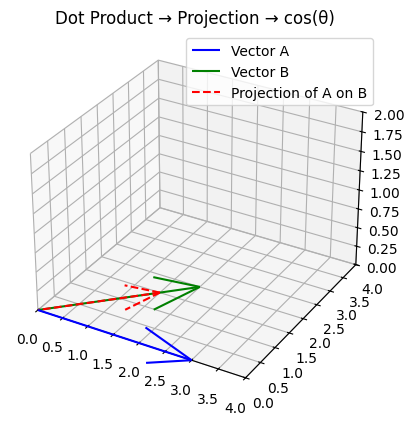

In [ ]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Vectors
ax.quiver(0,0,0, *A, color='blue', label='Vector A')
ax.quiver(0,0,0, *B, color='green', label='Vector B')
ax.quiver(0,0,0, *proj_vector, color='red', linestyle='dashed', label='Projection of A on B')

# Labels
ax.set_xlim([0,4])
ax.set_ylim([0,4])
ax.set_zlim([0,2])

ax.set_title("Dot Product → Projection → cos(θ)")
ax.legend()
plt.show()

# Now we show cross product

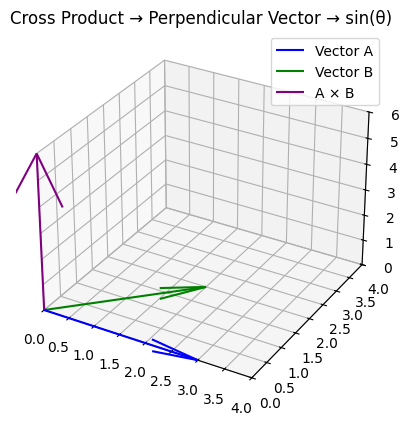

In [ ]:
# Cross product
C = np.cross(A, B)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0,0, *A, color='blue', label='Vector A')
ax.quiver(0,0,0, *B, color='green', label='Vector B')
ax.quiver(0,0,0, *C, color='purple', label='A × B')

ax.set_xlim([0,4])
ax.set_ylim([0,4])
ax.set_zlim([0,6])

ax.set_title("Cross Product → Perpendicular Vector → sin(θ)")
ax.legend()
plt.show()


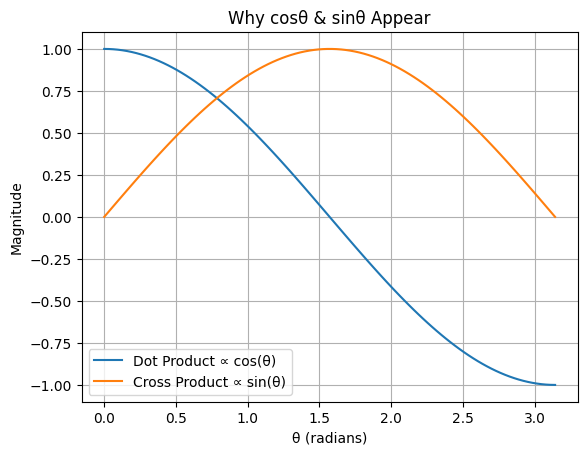

In [ ]:
angles = np.linspace(0, np.pi, 100)
dot_vals = []
cross_vals = []

A = np.array([1, 0, 0])

for theta in angles:
    B = np.array([np.cos(theta), np.sin(theta), 0])
    dot_vals.append(np.dot(A, B))
    cross_vals.append(np.linalg.norm(np.cross(A, B)))

plt.plot(angles, dot_vals, label="Dot Product ∝ cos(θ)")
plt.plot(angles, cross_vals, label="Cross Product ∝ sin(θ)")
plt.xlabel("θ (radians)")
plt.ylabel("Magnitude")
plt.title("Why cosθ & sinθ Appear")
plt.legend()
plt.grid(True)
plt.show()


# animating both

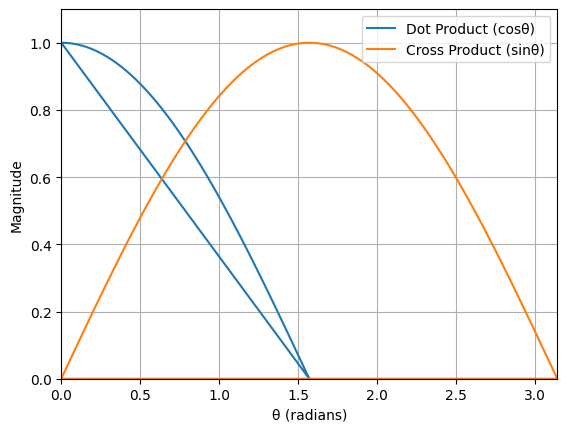

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

A = np.array([1, 0, 0])

fig, ax = plt.subplots()
ax.set_xlim(0, np.pi)
ax.set_ylim(0, 1.1)
ax.set_xlabel("θ (radians)")
ax.set_ylabel("Magnitude")

dot_line, = ax.plot([], [], label="Dot Product (cosθ)")
cross_line, = ax.plot([], [], label="Cross Product (sinθ)")
ax.legend()
ax.grid(True)

angles, dot_vals, cross_vals = [], [], []

def update(frame):
    theta = frame
    B = np.array([np.cos(theta), np.sin(theta), 0])

    dot_vals.append(np.dot(A, B))
    cross_vals.append(np.linalg.norm(np.cross(A, B)))
    angles.append(theta)

    dot_line.set_data(angles, dot_vals)
    cross_line.set_data(angles, cross_vals)
    return dot_line, cross_line

ani = FuncAnimation(fig, update, frames=np.linspace(0, np.pi, 100), interval=50)
HTML(ani.to_jshtml())


# visualizing flux circulation

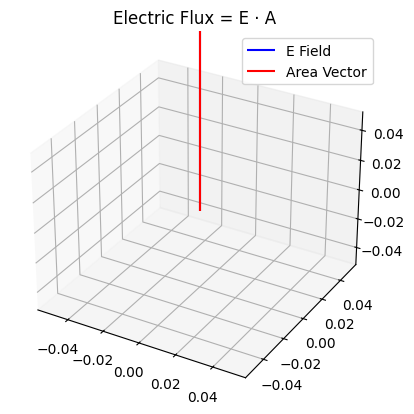

Electric Flux = 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

E = np.array([0, 0, 1])       # Electric field
A = np.array([0, 0, 1])       # Surface normal

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0,0, *E, color='blue', label='E Field')
ax.quiver(0,0,0, *A, color='red', label='Area Vector')

ax.set_title("Electric Flux = E · A")
ax.legend()
plt.show()

print("Electric Flux =", np.dot(E, A))


# Magnetic circulation

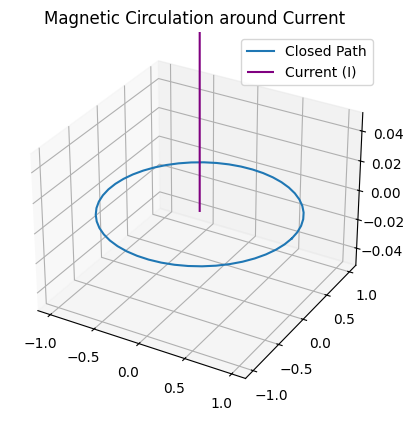

In [ ]:
theta = np.linspace(0, 2*np.pi, 50)
x = np.cos(theta)
y = np.sin(theta)
z = np.zeros_like(theta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, label="Closed Path")
ax.quiver(0,0,0, 0,0,1, color='purple', label='Current (I)')

ax.set_title("Magnetic Circulation around Current")
ax.legend()
plt.show()


# Divergence vs curl

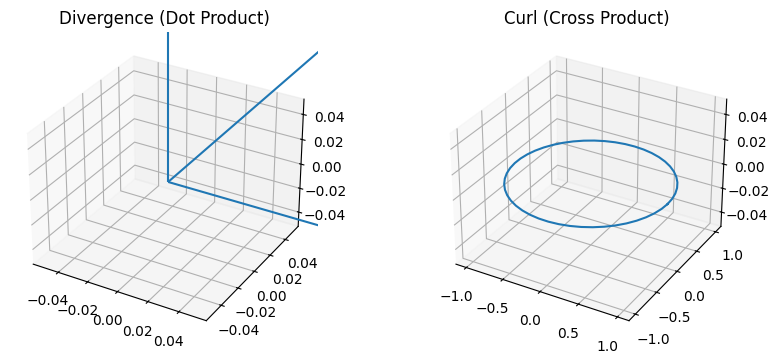

In [ ]:
fig = plt.figure(figsize=(10,4))

# Divergence (flux)
ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(0,0,0, 1,0,0)
ax1.quiver(0,0,0, 0,1,0)
ax1.quiver(0,0,0, 0,0,1)
ax1.set_title("Divergence (Dot Product)")

# Curl (circulation)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x, y, z)
ax2.set_title("Curl (Cross Product)")

plt.show()
